### 1.Import the libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from math import log2

### 2. Import the dataset

In [ ]:
data = pd.read_csv("/content/playgolf_data.csv")

### 3.Display the dataset information

In [ ]:
print(data)

     Outlook Temperature Humidity    Wind PlayGolf
0      Sunny         Hot     High    Weak       No
1      Sunny         Hot     High  Strong       No
2   Overcast         Hot     High    Weak      Yes
3      Rainy        Mild     High    Weak      Yes
4      Rainy        Cool   Normal    Weak      Yes
5      Rainy        Cool   Normal  Strong       No
6   Overcast        Cool   Normal  Strong      Yes
7      Sunny        Mild     High    Weak       No
8      Sunny        Cool   Normal    Weak      Yes
9      Rainy        Mild   Normal    Weak      Yes
10     Sunny        Mild   Normal  Strong      Yes
11  Overcast        Mild     High  Strong      Yes
12  Overcast         Hot   Normal    Weak      Yes
13     Rainy        Mild     High  Strong       No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
data.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


#Split the dataset into train and test


In [ ]:
df_train = pd.read_csv("/content/playgolf_data.csv")
df_test = pd.read_csv("/content/playgolf_data.csv")

#Find Missing Values

In [ ]:
missing_values = df_train.isnull().sum()
df_train = df_train.dropna()
df_train = df_train.fillna(df_train.mean())
missing_values = df_train.isnull().sum()
missing_values = df_test.isnull().sum()

df_test = df_test.dropna()
df_test = df_test.fillna(df_test.mean())
missing_values = df_test.isnull().sum()

<ipython-input-9-dd4e7fb43c7d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())
<ipython-input-9-dd4e7fb43c7d>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_test.mean())


# Encode the categorical data


In [ ]:
le= LabelEncoder()
for column in df_train.select_dtypes(include='object'):
  df_train[column] = le.fit_transform(df_train[column])

for column in df_test.select_dtypes(include='object'):
  df_test[column] = le.fit_transform(df_test[column])

In [ ]:
df_train.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
df_test.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


# Implement a Decision Tree algorithm using entropy and information gain. Split the dataset based on the features that maximize information gain at each node.

In [ ]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test	= df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 1.0
Confusion Matrix:
 <function confusion_matrix at 0x7ad1794815a0>
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [ ]:
information_gain = []

for i in range(len(X_train[0])):
    feature_values = X_train[:, i]
    unique_values = np.unique(feature_values)
    entropy_before_split = 0

    for value in unique_values:
        p = len(feature_values[feature_values == value]) / len(feature_values)
        if p > 0:
            entropy_before_split -= p * log2(p)

    entropy_after_split = 0

    for value in unique_values:
        sub_X = X_train[feature_values == value]
        sub_y = y_train[feature_values == value]
        entropy_sub = 0

        for label in np.unique(sub_y):
            p = len(sub_y[sub_y == label]) / len(sub_y)
            if p > 0:
                entropy_sub -= p * log2(p)

        entropy_after_split += len(sub_X) / len(X_train) * entropy_sub

    information_gain.append(entropy_before_split - entropy_after_split)

print("Information Gain:")
for i, feature in enumerate(df_train.columns[:-1]):
    print(f"{feature}: {information_gain[i]}")

Information Gain:
Outlook: 0.8838701439561536
Temperature: 0.6455933144511465
Humidity: 0.21154954269171045
Wind: 0.09306920777188987


# Implement a Decision Tree algorithm using Gini impurity. Split the dataset based on features that minimize Gini impurity at each node.

In [ ]:
import numpy as np

def gini_index(y):
    classes = np.unique(y)
    gini = 0
    for els in classes:
        p = len(y[y == els]) / len(y)
        if p > 0:
            gini += p * (1 - p)
    return gini

def split_data(X, y, feature_index, threshold):
    left_data = X[X[:, feature_index] <= threshold]
    right_data = X[X[:, feature_index] > threshold]
    left_labels = y[X[:, feature_index] <= threshold]
    right_labels = y[X[:, feature_index] > threshold]
    return left_data, right_data, left_labels, right_labels

def decision_tree(X, y, max_depth, min_samples_split):
    if len(np.unique(y)) <= 1 or max_depth == 0 or len(X) < min_samples_split:
        return DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

    best_gain = 0
    best_feature_index = None
    best_threshold = None

    for feature_index in range(X.shape[1]):
        for threshold in np.unique(X[:, feature_index]):
            left_data, right_data, left_labels, right_labels = split_data(X, y, feature_index, threshold)
            if len(left_data) == 0 or len(right_data) == 0:
                continue

            current_gain = gini_index(y) - (len(left_data) / len(X) * gini_index(left_labels) + len(right_data) / len(X) * gini_index(right_labels))

            if current_gain > best_gain:
                best_gain = current_gain
                best_feature_index = feature_index
                best_threshold = threshold

    left_data, right_data, left_labels, right_labels = split_data(X, y, best_feature_index, best_threshold)

    def decision_tree(data, labels, max_depth, min_samples_split):
        left_tree = decision_tree(left_data, left_labels, max_depth - 1, min_samples_split)
        right_tree = decision_tree(right_data, right_labels, max_depth - 1, min_samples_split)
        return DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

In [ ]:
entropy_model = DecisionTreeClassifier(criterion='entropy')
entropy_model.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

gini_model = DecisionTreeClassifier(criterion='gini')
gini_model.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

entropy_predictions = entropy_model.predict(df_test.iloc[:, :-1])
gini_predictions = gini_model.predict(df_test.iloc[:, :-1])

entropy_accuracy = accuracy_score(df_test.iloc[:, -1], entropy_predictions)
gini_accuracy = accuracy_score(df_test.iloc[:, -1], gini_predictions)

print("Entropy Model Accuracy:", entropy_accuracy)
print("Gini Impurity Model Accuracy:", gini_accuracy)

Entropy Model Accuracy: 1.0
Gini Impurity Model Accuracy: 1.0


# Visualizing the decision tree from the scikit-learn output using any appropriate library

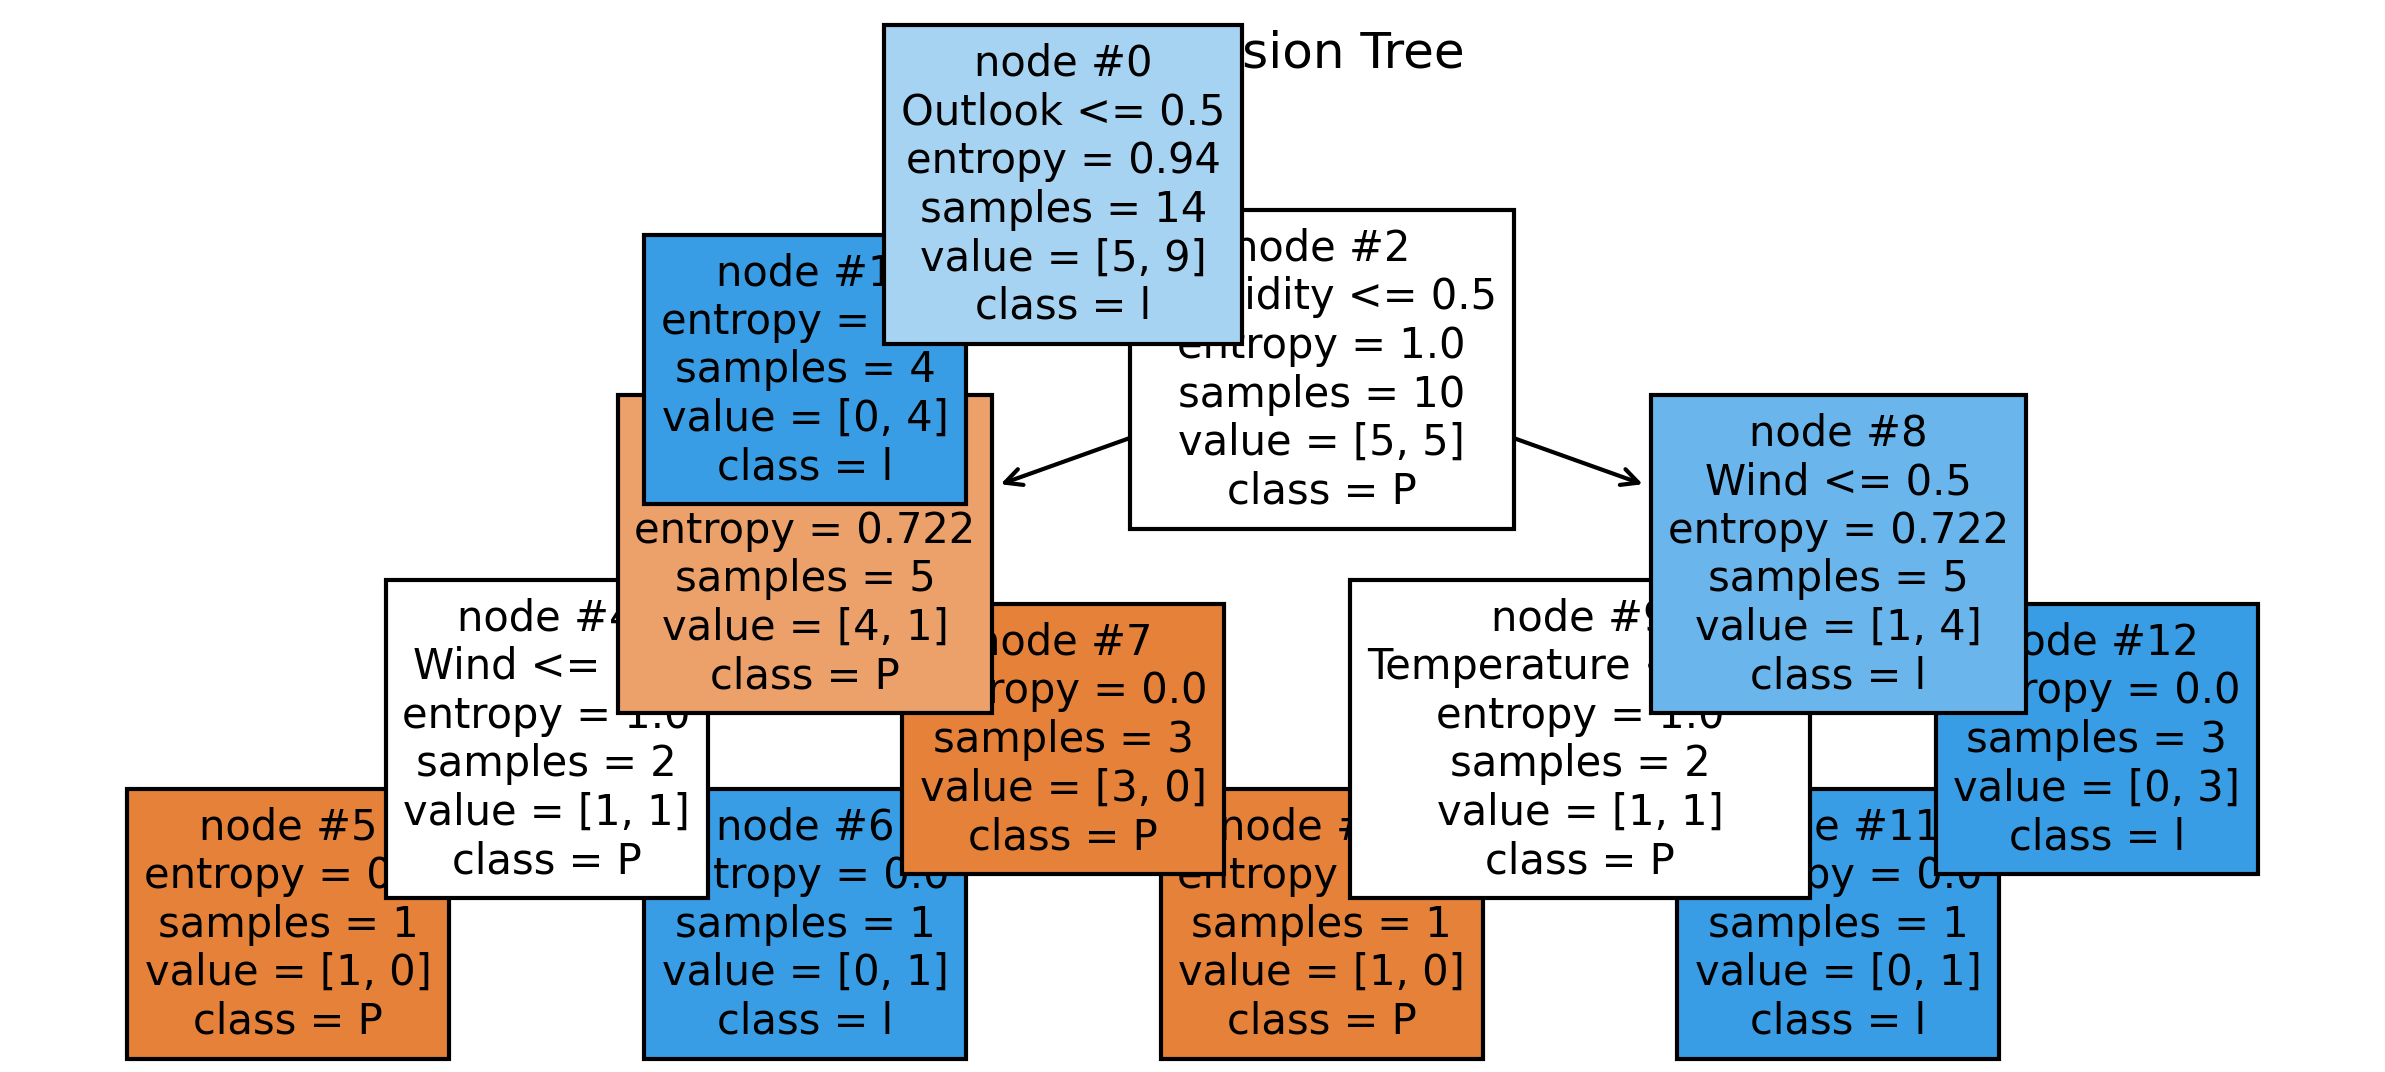

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4), dpi=300)
tree.plot_tree(entropy_model,
               feature_names=df_train.columns[:-1], class_names=df_train.columns[-1],
               filled=True, node_ids=True, fontsize=10)
plt.title('Entropy Decision Tree')
plt.show()

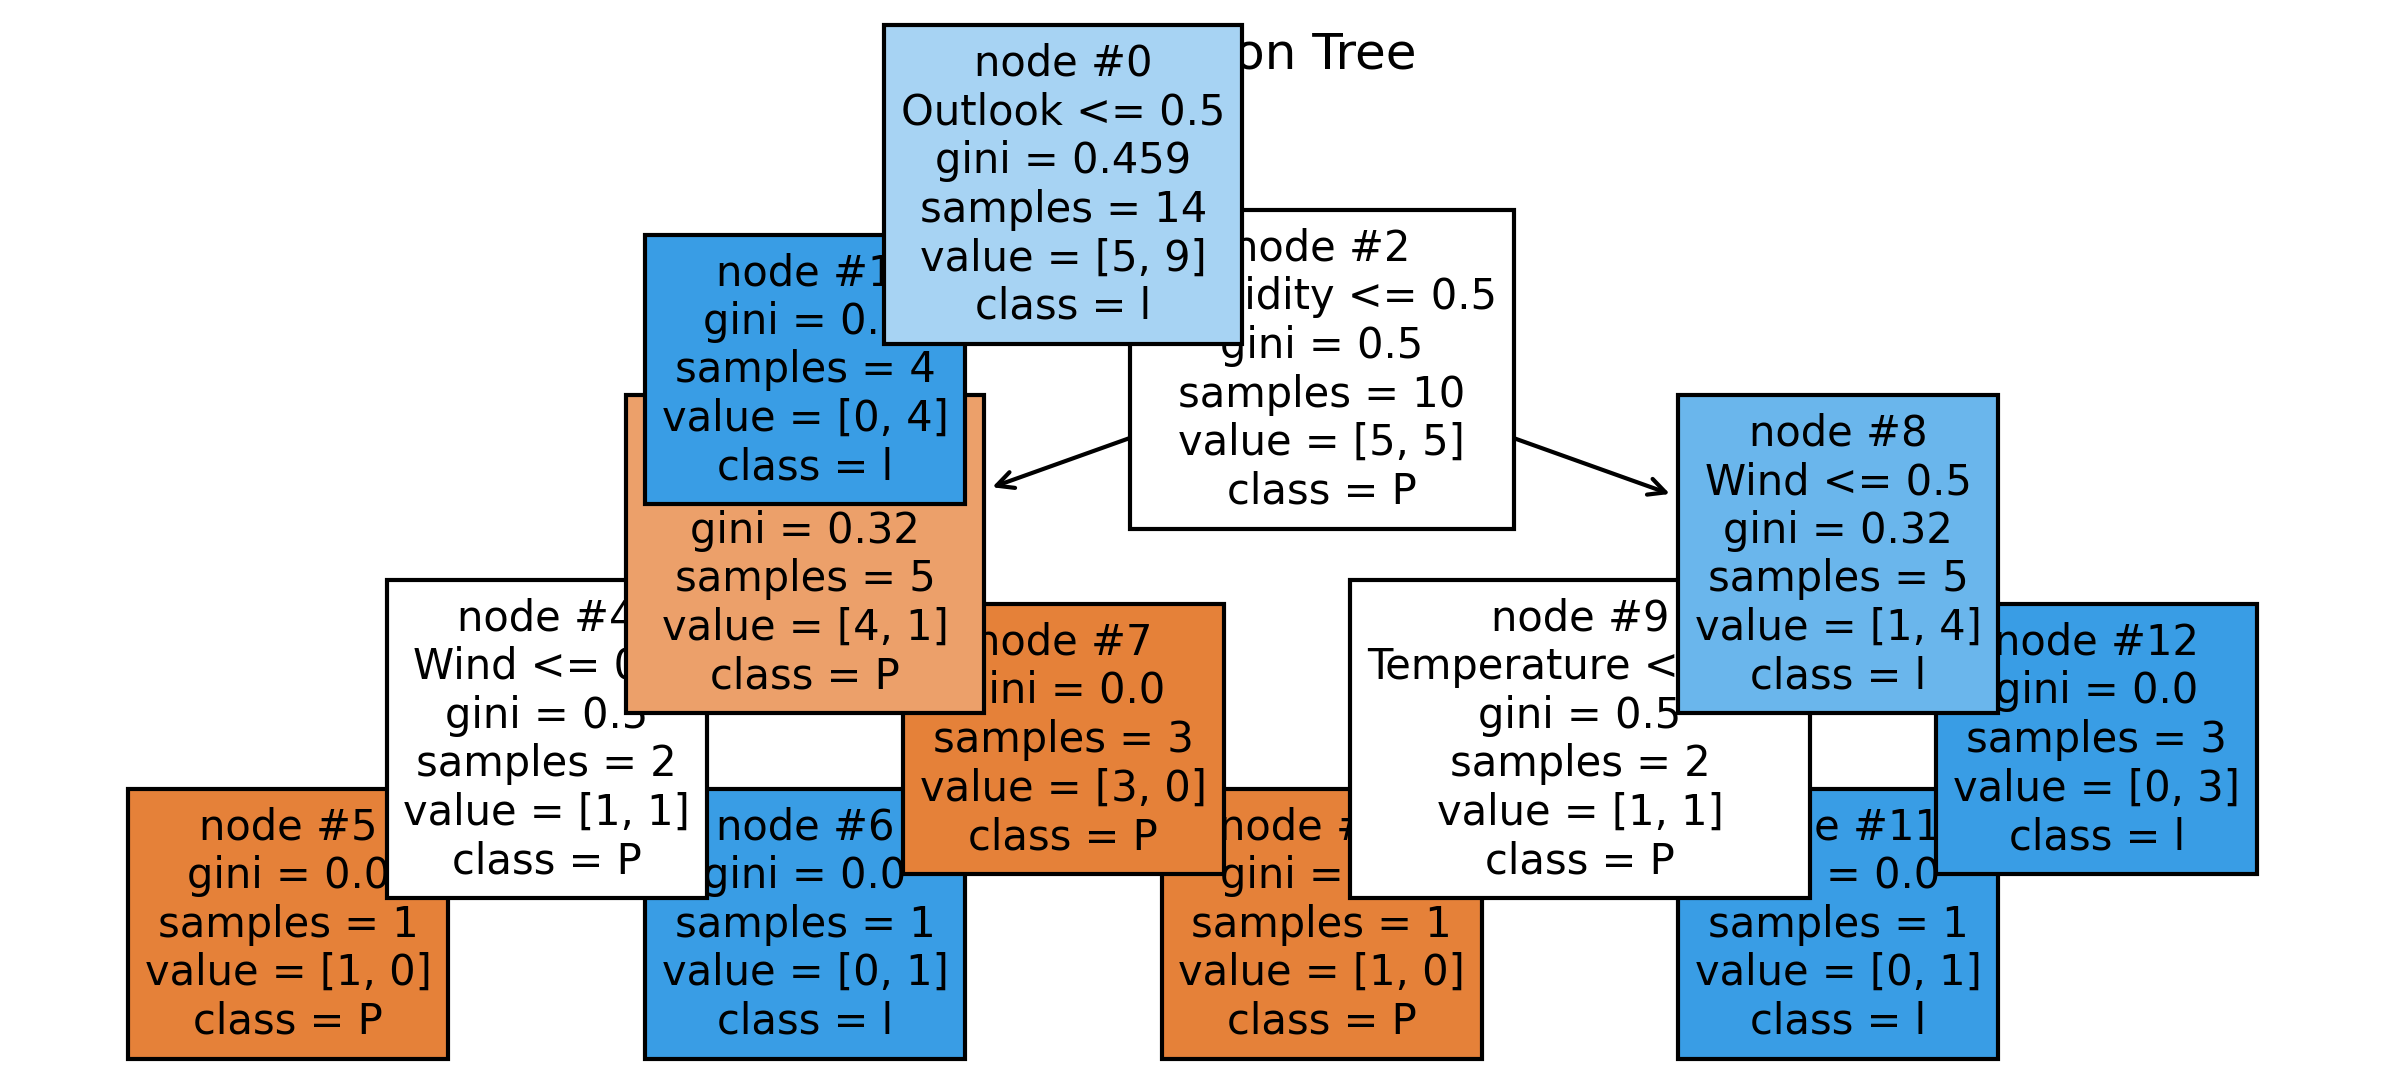

In [ ]:
plt.figure(figsize=(10, 4), dpi=300)
tree.plot_tree(gini_model,
               feature_names=df_train.columns[:-1], class_names=df_train.columns[-1],
               filled=True, node_ids=True, fontsize=10)
plt.title('Gini Decision Tree')
plt.show()

# After creating models in both the scratch and using scikit-learn, evaluate their performance using appropriate metrics (accuracy, precision, recall, and Fl-score).

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

entropy_accuracy = accuracy_score(df_test.iloc[:, -1], entropy_predictions)
entropy_precision = precision_score(df_test.iloc[:, -1], entropy_predictions)
entropy_recall = recall_score(df_test.iloc[:, -1], entropy_predictions)
entropy_f1_score = f1_score(df_test.iloc[:, -1], entropy_predictions)

gini_accuracy = accuracy_score(df_test.iloc[:, -1], gini_predictions)
gini_precision = precision_score(df_test.iloc[:, -1], gini_predictions)
gini_recall = recall_score(df_test.iloc[:, -1], gini_predictions)
gini_f1_score = f1_score(df_test.iloc[:, -1], gini_predictions)

In [ ]:
print("Entropy Model Accuracy:", entropy_accuracy)
print("Entropy Model Precision:", entropy_precision)
print("Entropy Model Recall:", entropy_recall)
print("Entropy Model F1 Score:", entropy_f1_score)

Entropy Model Accuracy: 1.0
Entropy Model Precision: 1.0
Entropy Model Recall: 1.0
Entropy Model F1 Score: 1.0


In [ ]:
print("Gini Model Accuracy:", gini_accuracy)
print("Gini Model Precision:", gini_precision)
print("Gini Model Recall:", gini_recall)
print("Gini Model F1 Score:", gini_f1_score)

Gini Model Accuracy: 1.0
Gini Model Precision: 1.0
Gini Model Recall: 1.0
Gini Model F1 Score: 1.0
